# Seek Job Listings: 2018 to 2021

## *Dataset description*

Two datasets from Kaggle were used for the purposed of this report, both based on Australian job market data collected from Seek.com.au. The first dataset covers the year 2018, while the second spans data related roles from 2019 through 2021.

After data taming and merging, the final dataset *seek2018_2019_clean* comprises some 22,887 rows and 14 columns, with data types including datetime, integers and strings. Post-merging and prior to proceeding with the analysis, the following data manipulation steps were taken:

The DataFrame index was reset to maintain consistency using Python's reset_index method. This step resolved some a merging conflict error. Categorical variables from seek2019 were renamed to ensure a uniform naming convention.

The 'salary_offered' column required the creation of custom functions to parse content in strings to integers. This  enabled numerical analysis. In the 'state' column, multiple observations were standardized. This was done to  ensuring a consistent naming convention and appropriately aggregate regional data.

The dataset's numerical columns ('salary_offered', 'day', 'month, 'year, 'R', 'Python', 'Matlab', 'SQL', 'Ruby', 'C', 'Tableau', 'Javascript') and the categorical 'state' column can be effectively handled as 1D NumPy arrays.

The columns with objects contain mixed types. This makes them more suitable for use with the pandas package.

In [58]:
seek2018_2019_clean.dtypes

year                       int32
month                      int32
day                        int32
job_title                 object
state             string[python]
salary_offered           float64
R                        float64
Python                   float64
Matlab                   float64
SQL                      float64
Ruby                     float64
C                        float64
Tableau                  float64
Javascript               float64
dtype: object

## Dataset 1- Seek job listings 2018

This dataset was sourced from [Kaggle](https://www.kaggle.com/datasets/PromptCloudHQ/australian-job-listings-data-from-seek-job-board/data). It offers an overview of the trends in the Australian job market and contains 20030 rows and 13 coloumns. The data type categorical variables and for the purpose of this analysis 'post-date', job_title', 'job_type', 'salary_offered' and 'state' are of interest. Prior to taming and manipulation, the dataset is in strings.

The key parsing challenges was conversion of the 'post_date' variable to a datetime object, which was a crucial step prior to performing any time-series analysis. It should also be noted the dataset is not the common 'utf-8' format and requires encoding with Latin-1 (ISO-8859-1).

In [93]:
import datetime
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

file_path = '/Users/mudaphilly/code/UoA/Python A/Assessments/Datasets for a4/seek_australia_sample.csv'
seekJobs2018 = pd.read_csv(file_path, encoding='latin1')
display(seekJobs2018.head(2))

,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered
0,https://www.seek.com.au/job/36028685,2018-04-20 03:57:04 +0000,Package Lead - Pipeline Installation,"Mining, Resources & Energy",FIRCROFT AUSTRALIA PTY LTD,Perth,2018-04-19T05:41:52Z,The Role: General Execution Accountable for sa...,Contract/Temp,seek,AU,NaN,NaN
1,https://www.seek.com.au/job/36028693,2018-04-20 03:52:46 +0000,Department Manager - Bakery - Campbelltown Region,Retail & Consumer Products,Coles,Sydney,2018-04-19T05:42:19Z,The role As a Coles Bakery Manager you will: w...,Full Time,seek,AU,South West & M5 Corridor,NaN


## Data Set 2- Seek Data Science Job Listings 2019-2021

This dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/nomilk/data-science-job-listings-australia-20192020), contains 2,857 rows and 52 columns and features dates, numbers, and strings. The key variables of interest are 'jobTitle', 'listingDate', 'salary_string', and the various programming languages. 

This dataset also requires datetime conversion. Additionally, renaming categorical variables to match those in the Seek 2018 dataset was required prior to merging the two dataset. 

In [3]:
file_path = '/Users/mudaphilly/code/UoA/Python A/Assessments/Datasets for a4/listings2019_2021.csv'
seekJobs2019 = pd.read_csv(file_path)
display(seekJobs2019.head(2))

,jobId,jobTitle,jobClassification,jobSubClassification,advertiserName,advertiserId,companyId,companyName,companyRating,listingDate,...,Haskell,Lisp,Golang,Spark,Javascript,F#,Fortran,first_seen,last_seen,recruiter
0,38098375,Senior Method Development Immunoassay Scientis...,Science & Technology,Biological & Biomedical Sciences,Hobson Prior Australia,30969882,NaN,NaN,NaN,2019-01-16 12:17:41,...,0,0,0,0,0,0,0,2019-03-06,2019-03-11,1
1,38259053,Pricing Data Scientist - Lower North Shore,Information & Communication Technology,Other,Randstad - Technologies,26537413,NaN,NaN,NaN,2019-02-04 13:02:22,...,0,0,0,0,0,0,0,2019-03-06,2019-03-06,1


## Data Taming and Tidying

#### *Dataset 1 - Seek 2018*

In [68]:
# Remove unwanted columns
seekJobs2018_tamed = seekJobs2018.drop(columns=['pageurl', 'job_board', 'geo', 'crawl_timestamp'])

# Convert 'post_date' to datetime
seekJobs2018_tamed2 = seekJobs2018_tamed.copy()
seekJobs2018_tamed2['post_date'] = pd.to_datetime(seekJobs2018_tamed2['post_date'], errors='coerce', utc=True)
seekJobs2018_tamed2['post_date'] = seekJobs2018_tamed2['post_date'].dt.date

display(seekJobs2018_tamed2.head(3))

,job_title,category,company_name,city,post_date,job_description,job_type,state,salary_offered
0,Package Lead - Pipeline Installation,"Mining, Resources & Energy",FIRCROFT AUSTRALIA PTY LTD,Perth,2018-04-19,The Role: General Execution Accountable for sa...,Contract/Temp,NaN,NaN
1,Department Manager - Bakery - Campbelltown Region,Retail & Consumer Products,Coles,Sydney,2018-04-19,The role As a Coles Bakery Manager you will: w...,Full Time,South West & M5 Corridor,NaN
2,Freight Handler,"Manufacturing, Transport & Logistics",Zoom Recruitment & Training,Sydney,2018-04-19,Our client is a leader within the Transport / ...,Casual/Vacation,Parramatta & Western Suburbs,$34 - $39 p.h.


#### *Dataset 2 - Seek 2019-21*

In [69]:
#Remove unessecary variables
seekJobs2019_tamed = seekJobs2019.drop(columns=['jobId', 'desktopAdTemplate', 'mobileAdTemplate','jobSubClassification','isRightToWorkRequired','suburb','area','nation' , 'Java','advertiserName', 'seekJobListingUrl', 'companyProfileUrl' ,'expiryDate','companyRating','Stata', 'Minitab', 'SPSS', 'Scala','SAS', 'Julia', 'Knime', 'D3', 'Clojure' , 'Hadoop' ,'advertiserId', 'companyId', 'Haskell', 'Lisp', 'Golang', 'Spark','F#', 'Fortran', 'first_seen', 'last_seen', 'recruiter'])

# Convert to datetime
seekJobs2019_tamed2 = seekJobs2019_tamed.copy()
seekJobs2019_tamed2['listingDate'] = pd.to_datetime(seekJobs2019_tamed2['listingDate'])
seekJobs2019_tamed2['listingDate'] = seekJobs2019_tamed2['listingDate'].dt.date

# Check variable namings
column_list = seekJobs2019_tamed2.columns.tolist()
print(column_list,"\n")
column_list2 = seekJobs2018_tamed2.columns.tolist()
print(column_list2)

# Remap variables to match 2018 dataset
variable_mapping = {
    'jobTitle': 'job_title',
    'jobClassification': 'category',
    'companyName': 'company_name',
    'listingDate': 'post_date',
    'salary_string': 'salary_offered',
    'workType': 'job_type'
}

seekJobs2019_tamed3 = seekJobs2019_tamed2.copy()
for old_variable, new_variable in variable_mapping.items():
    seekJobs2019_tamed3 = seekJobs2019_tamed3.rename(columns={old_variable: new_variable})

display(seekJobs2019_tamed3.head(3))

['jobTitle', 'jobClassification', 'companyName', 'listingDate', 'teaser', 'state', 'city', 'workType', 'salary_string', 'R', 'Python', 'Matlab', 'SQL', 'Ruby', 'C', 'Tableau', 'Javascript'] 

['job_title', 'category', 'company_name', 'city', 'post_date', 'job_description', 'job_type', 'state', 'salary_offered']


,job_title,category,company_name,post_date,teaser,state,city,job_type,salary_offered,R,Python,Matlab,SQL,Ruby,C,Tableau,Javascript
0,Senior Method Development Immunoassay Scientis...,Science & Technology,NaN,2019-01-16,My client is a leading Australian-owned and ra...,New South Wales,Sydney,Full Time,NaN,1,0,0,0,0,0,0,0
1,Pricing Data Scientist - Lower North Shore,Information & Communication Technology,NaN,2019-02-04,The Data Scientist will be responsible for mon...,Australian Capital Territory,ACT,Full Time,Super,1,0,0,0,0,0,0,0
2,Insights Analyst – Online Video Streaming,Information & Communication Technology,NaN,2019-02-05,Fantastic organisation seeks experienced Insig...,New South Wales,Sydney,Full Time,$90000 - $120000 per annum,1,0,0,1,0,0,0,0


## *Joining the two datasets*

In [70]:
# Combine the two datasets
seek2018_2019 = pd.concat([seekJobs2019_tamed3, seekJobs2018_tamed2])
seek2018_2019 = seek2018_2019.drop(columns=['job_description', 'company_name', 'teaser'])
# Reset dataframe index
seek2018_2019.reset_index(drop=True, inplace=True)

#### *Combined Dataset Taming and Tidying*

Initial observations of the dataset revealed pre-processing would be required prior to moving onto any data analysis and visualisations. Specfically, the salary_offered coloumn is in a string format but needs transformation to  integers. The State column contains a wide range of observations in need of standardisation.

In [71]:
# Inspect what's in salary and state columns
print(seek2018_2019['salary_offered'].head(100))
print("\n")
print(seek2018_2019['state'].unique())

0                                       NaN
1                                     Super
2                $90000 - $120000 per annum
3                         $90k - $110k p.a.
4                                       NaN
                      ...                  
95            $80k - $85k p.a. + negotiable
96                                      NaN
97                                      NaN
98    Attractive salary packages available 
99              $200,000 - $260,000 package
Name: salary_offered, Length: 100, dtype: object


['New South Wales' 'Australian Capital Territory' 'Victoria'
 'Western Australia' 'Queensland' 'Northern Territories' 'South Australia'
 'Tasmania' 'UK & Ireland' 'Overseas' nan 'South West & M5 Corridor'
 'Parramatta & Western Suburbs' 'CBD & Inner Suburbs'
 'North Shore & Northern Beaches' 'Western Suburbs'
 'Bayside & South Eastern Suburbs' 'North West & Hills District'
 'Fremantle & Southern Suburbs' 'CBD, Inner West & Eastern Suburbs'
 'Eastern Suburbs' 'S

#### **Functions to handle salary_offered variable**

Extracts numeric values from strings using Pandas re library. The *extract_salary* function then executes calculations for each match condition.

In [72]:
#help(re.sub)
#help(re.findall)

# Take finanicial abbrevations as object, convert by mutiplying by 100
def letters_to_numbers(match):
    number = int(match.group(1))
    multiplier = 1000 if match.group(2) == 'k' else 1000000
    return str(number * multiplier)

# Take hourly_rates as object, convert using a 40hr work week
def calculate_annual_salary(hourly_rates):
    if hourly_rates:
        highest_hourly_rate = max(hourly_rates)
        annual_salary = int(highest_hourly_rate * 8 * 5 * 52)
        return (annual_salary)
    else:
        return np.nan

# Take salary_string as object, using findall method match with k, ph or a salary range 
def extract_salary(salary_str):
    # Error handling. Don't call np.nan for non-strings or null values (without this it breaks)
    if not isinstance(salary_str, str) or pd.isnull(salary_str):
        return np.nan

    # Remove all characters and words from a string
    clean_str = re.sub('[$, ]|package', '', salary_str.lower())

    # Turn 'k' or 'm' in strings to numeric values
    clean_str = re.sub(r'(\d+)([km])', letters_to_numbers, clean_str)
    
    # Turn 'ph' in strings to annual salary
    hourly_rates = [int(num) for num in re.findall(r'\d+', clean_str)]
    
    # Take clean_str and convert to to integers
    numbers = [int(num) for num in re.findall('\d+', clean_str)]

    # Sum total and count to get an average. Don't call if zero or empty
    return sum(numbers) / len(numbers) if numbers else np.nan

##### *Re-map observations in state column to match Australian states*

In [73]:
def convert_state(city):
    # Use dictionaries to organise the unique values
    state_map = {
        'New South Wales': [
            'South West & M5 Corridor', 'North Shore & Northern Beaches', 'Western Suburbs',
            'CBD & Inner Suburbs', 'Bayside & South Eastern Suburbs', 'North West & Hills District',
            'Southern Suburbs & Sutherland Shire', 'CBD, Inner West & Eastern Suburbs',
            'North Shore & Northern Beaches', 'Western Suburbs', 'North West & Hills District',
            'Eastern Suburbs','CBD, Inner & Western Suburbs','Ryde & Macquarie Park' 
        ],
        'Western Australia': [
            'Fremantle & Southern Suburbs', 'Northern Suburbs', 'Rockingham & Kwinana',
            'Northern Suburbs & Joondalup'
        ],
        'Queensland': [
            'Southern Suburbs & Logan', 'Western Suburbs & Ipswich'
        ],
        'Victoria': [
            'Parramatta & Western Suburbs', 'Bayside & South Eastern Suburbs', 'Bayside & Eastern Suburbs'
        ]
    }

    overseas_states = [
        'UK & Ireland', 'Napier', 'Rotorua', 'Porirua & Kapiti Coast', 'New Plymouth', 
        'Auckland Central', 'Manukau & East Auckland', 'Rodney & North Shore', 
        'Wellington Central', 'Rest of Northland', 'Hamilton', 'Queenstown & Wanaka', 
        'Nelson', 'Waitakere & West Auckland', 'Rest of Wellington Region', 
        'Rest of Tasman', 'Christchurch', 'Dunedin', 'Rest of Waikato', 
        'Papakura & Franklin', 'Hastings', 'Blenheim', 'Tauranga', 'Rest of Hawkes Bay', 
        'Rest of Bay of Plenty', 'Invercargill', 'Hutt Valley', 'Rest of Otago', 
        'Gisborne', 'Rest of Canterbury', 'Palmerston North', 'Wanganui', 
        'North Canterbury', 'Timaru & South Canterbury', 'Whangarei', 
        'Rest of Manawatu', 'Greymouth', 'Rest of Taranaki', 'Rest of West Coast', 
        'Taupo', 'Rest of Southland', 'Thames & Coromandel', 'Rest of Marlborough'
    ]
    # use loop to iterate through values, calling relevant function if value matches dictionary key 
    if city in overseas_states:
        return 'Overseas'
    else:
        for state, cities in state_map.items():
            if city in cities:
                return state
        # If 'city' is not in state_map or overseas_state dictionaries, return the 'city'
        return city

##### Apply custom functions to tame *'salary_offered'* and *'state'* variables in **seek2018_2019_tamed** dataset

In [74]:
seek2018_2019_tamed = seek2018_2019.copy()

# Call functions
seek2018_2019_tamed['salary_offered'] = seek2018_2019['salary_offered'].apply(extract_salary)
seek2018_2019_tamed['state'] = seek2018_2019_tamed['state'].apply(convert_state)

# Inspect
print("Salaries after applying function:")
display(seek2018_2019_tamed['salary_offered'].head(100))

#Inspect it
unique_states = seek2018_2019_tamed['state'].unique()
print("\nUnique values in state after applying function:\n", unique_states)

Salaries after applying function:


0          NaN
1          NaN
2     105000.0
3     100000.0
4          NaN
        ...   
95     82500.0
96         NaN
97         NaN
98         NaN
99    230000.0
Name: salary_offered, Length: 100, dtype: float64


Unique values in state after applying function:
 ['New South Wales' 'Australian Capital Territory' 'Victoria'
 'Western Australia' 'Queensland' 'Northern Territories' 'South Australia'
 'Tasmania' 'Overseas' nan]


##### Data type transformations

In [75]:
seek2018_2019_clean = seek2018_2019_tamed

# Refactor post_date to date objects. Create day/month/year variables
seek2018_2019_clean['post_date'] = pd.to_datetime(seek2018_2019_tamed['post_date'])
seek2018_2019_clean['day'] = seek2018_2019_clean['post_date'].dt.day
seek2018_2019_clean['month'] = seek2018_2019_clean['post_date'].dt.month
seek2018_2019_clean['year'] = seek2018_2019_clean['post_date'].dt.year

# String conversions
seek2018_2019_clean['state'] = seek2018_2019_tamed['state'].astype('string')

# Drop unwanted coloumns
seek2018_2019_clean = seek2018_2019_clean.drop(columns=['post_date'])
seek2018_2019_clean = seek2018_2019_clean.drop(columns=['job_type'])
seek2018_2019_clean = seek2018_2019_clean.drop(columns=['category'])
seek2018_2019_clean = seek2018_2019_clean.drop(columns=['city'])

columns_to_front = ['year', 'month', 'day']
remaining_columns = [col for col in seek2018_2019_clean.columns if col not in columns_to_front]
new_column_order = columns_to_front + remaining_columns
# Reset index again using the reindex method
seek2018_2019_clean = seek2018_2019_clean.reindex(columns=new_column_order)

### Final dataset

In [76]:
display(seek2018_2019_clean)

,year,month,day,job_title,state,salary_offered,R,Python,Matlab,SQL,Ruby,C,Tableau,Javascript
0,2019,1,16,Senior Method Development Immunoassay Scientis...,New South Wales,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,2,4,Pricing Data Scientist - Lower North Shore,Australian Capital Territory,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,2,5,Insights Analyst – Online Video Streaming,New South Wales,105000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2019,2,5,Credit Risk Analyst,New South Wales,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2019,2,5,Data Scientist,New South Wales,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22882,2018,10,26,Lecturer/Senior Lecturer in Green Chemical Sci...,Overseas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22883,2018,10,25,Technology 1 Administrator,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22884,2018,10,26,Intermediate Accountant - Business Services,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22885,2018,10,25,Surgical/Medical Experienced Endorsed and Regi...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Line plot

## All jobs postings by month

This line plot **(Figure 1)** depicts the sum total of job listings by month. The x-axis contains calender months from January to December, while the y-axis quantifies job postings and ranges from from zero to 5,000.

**Key trends:**

- The least number of postings occur in January and December.
- There are notable increases in February, May, and September, with peaks in March, July, and October.
- With each peak, a substantial decline follows.
    
**Data insights:**

- There is signficant fluctuation in job listings throughout the year.  
- The hiring process likely aligns with more broader cultural and/or business cycles in Australia.
- The optimal time to look for work is April, June and October

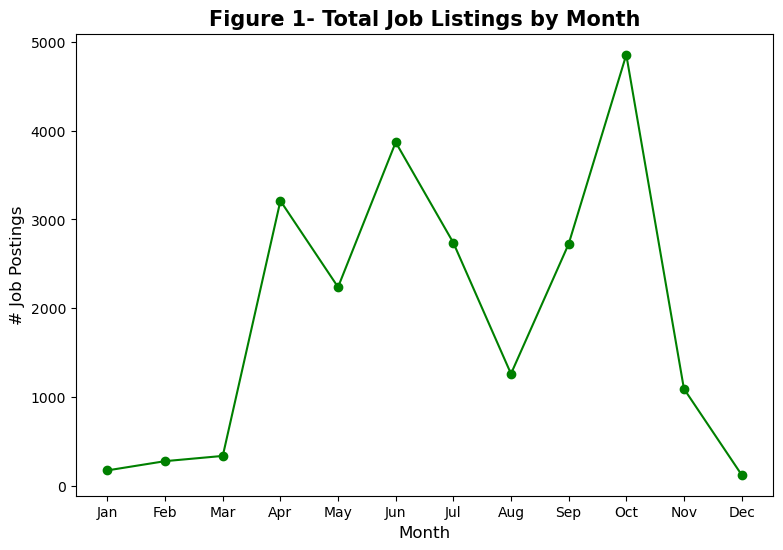

In [77]:
# df created to store the month count. Uses Pandas value_counts method to unique observations. 
# Sort_index is chained to assigns to it's 'month' index
monthly_job_counts = seek2018_2019_clean['month'].value_counts().sort_index()

# Lineplot
plt.figure(figsize=(9, 6))
plt.plot(monthly_job_counts.index, monthly_job_counts.values, marker='o', linestyle='-', color='green')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Figure 1- Total Job Listings by Month', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('# Job Postings', fontsize=12)
plt.grid(False)
plt.show()

# Box plot

## Salary distributions by state

This boxplot **(Figure 2)** displays offered salary distributions across Australian states. The horizontal axis categorizes the states, including an 'Overseas' category, while the vertical axis displays the salary range in dollars.

**Key Observations:**

- Median salary, as indicated by the central line in each box, is relatively consistent across the states.
- New South Wales and Victoria have the highest salary ranges. 
- Outliers are present in several states, indicating salaries that are significantly higher than the typical range. New South Wales has the highest number of upper outliers.

**Interpretation:**

- The consistency in median salaries across states suggests wages across the country are relatively consistent.
- Locations with outliers in upper salary range likely reflects where the specialized industries who are prepared to pay higher wages are located.
- The compact boxplots in Tasmania and South Australia may suggest the opposite (smaller, homogeneous markets).

Note initial plotting revealed outliers skewing the dataset. Pre-processing was needed to improve readability. For this cause, a custom function to remove outliers was created.

In [78]:
def remove_outliers(df, salary_col):
    Q1 = df[salary_col].quantile(0.25)
    Q3 = df[salary_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[salary_col] >= lower_bound) & (df[salary_col] <= upper_bound)
    return df[mask].copy()

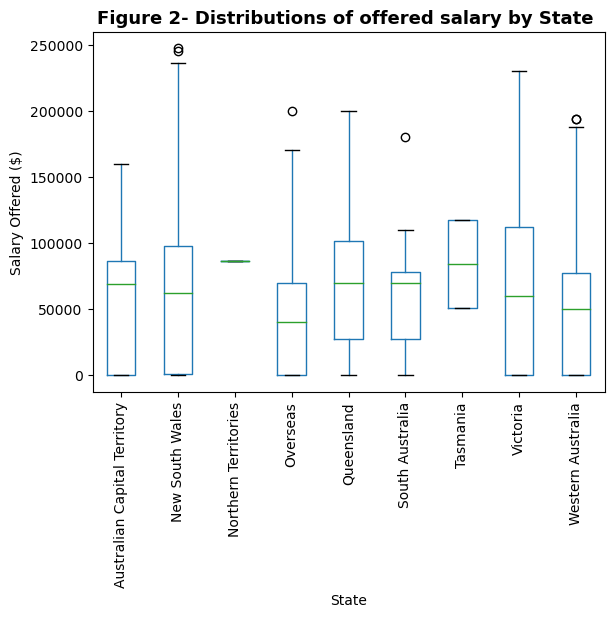

In [79]:
# Call remove_outliers
states_no_outliers = remove_outliers(seek2018_2019_clean, 'salary_offered')
# Boxplot
ax = states_no_outliers.boxplot(column='salary_offered', by='state', grid=False)
plt.title('Figure 2- Distributions of offered salary by State ', fontsize=13, fontweight='bold')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('Salary Offered ($)')
plt.xticks(rotation=90)
plt.show()

# Pie plot

## Data job postings by State

This Pie plot (**Figure 3**) with a custom donut chart mask filters out job posts with data related roles and compares total listings proportions by State.

**Key Details:**

- New South Wales has by far the most listings (*44.7%*). Victoria follows with second most (*26.9%*).
- Queensland (*8.6%*), ACT (*8.2%) and Western Australia (*7.3%*) have modest shares.  
- Listings shared reduce from South Australia (*3.3%), Overseas (*0.6%) and finally Tasmania (*0.2%).

**Analysis:**

- There is a lot of variation in tech roles in the Australian market. New South Wales and Victoria appear to be the central hubs whereas Tasmania likely has less focus on data-related industries (and/or smaller job market).
- The presence of Overseas positions in the data hints at the potential for remote work opportunities.

In [80]:
# Filter for job titles with 'data'
data_related_jobs = seek2018_2019_clean[seek2018_2019_clean['job_title'].str.contains('data', case=False, na=False)]

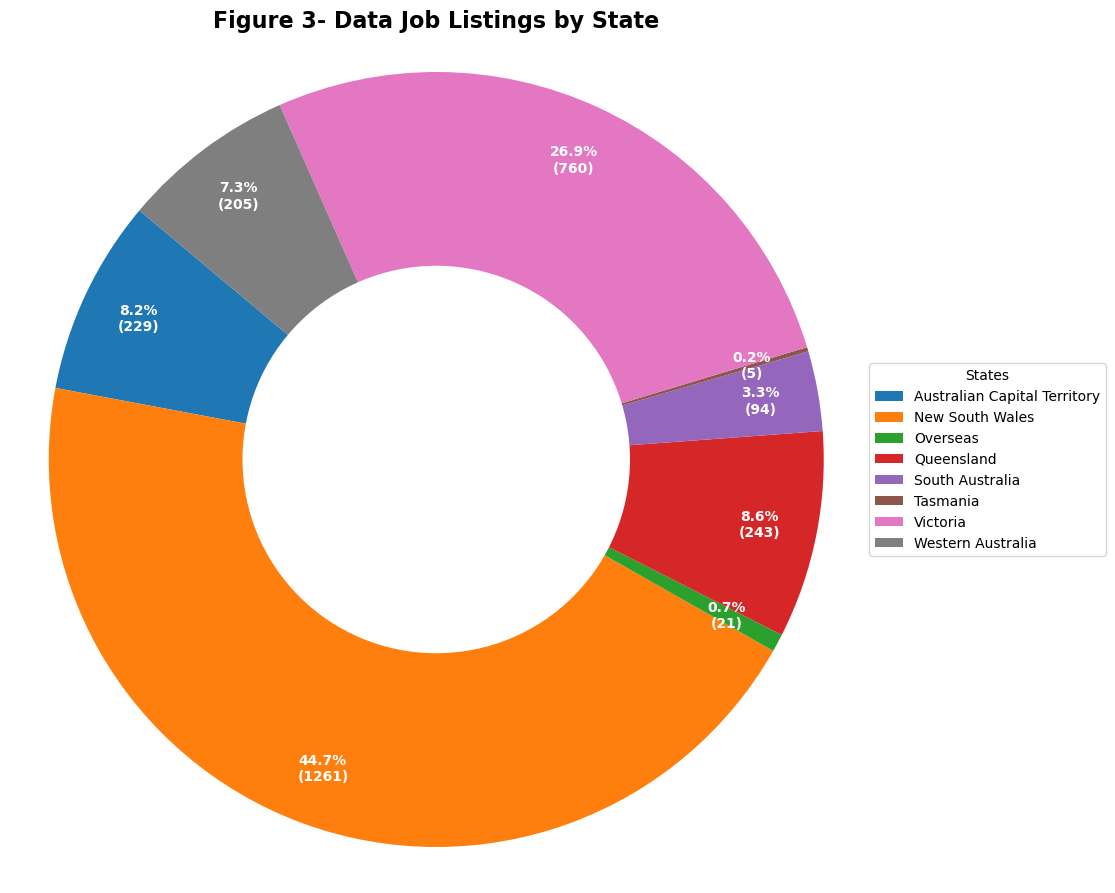

In [81]:
# Use pandas groupby method to arrange data by state, then call size to count each observation
# Note the 'convert_state' function applies data manipulation for this plot
data_jobs_by_state = data_related_jobs.groupby('state').size()

# Use matplotlibs donut documentation to create custom pie plot
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(11, 11))
wedges, texts, autotexts = ax.pie(data_jobs_by_state, 
                                  autopct=lambda pct: func(pct, data_jobs_by_state),
                                  startangle=140, 
                                  textprops=dict(color="white"),
                                  pctdistance=0.85)

ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)
ax.legend(wedges, data_jobs_by_state.index, title="States", loc="center left", bbox_to_anchor=(1, 0.5))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Figure 3- Data Job Listings by State', fontsize=16, fontweight='bold')
plt.show()

# Histogram Plots- 
## Programming Language Trends in Data Science Jobs (2019 v 2021)

These side-by-side histogram plots compares the mentions of various programming languages in data science job advertisements for the years 2019 and 2021.

**2019 Trends:**

- *R* and *Python* are the most in demand languages , with R slightly edging out Python.
- *Matlab*, *SQL*, and *Ruby* have moderate mentions.
- *C*, *Tableau*, and *Javascript* are mentioned less frequently.

**2021 Trends:**

- *Python* is by far the most mentioned language. *SQL* has increased siginifcantly
- *Tableau* and *Matlab* have seen noticeable increase in mentions, R has seen a noticeable decrease.
- *Ruby*, *C*, and *Javascript* remain less mentioned.

**Analysis:**

- There is a shift in demand from *R* to *Python*. This might reflect evolving industry trends or Python's increasing importance for data science roles.
- The rise of *Tableau* and *Matlibplot* could suggest the need for data visualization skills is increasing.
- The changing trends suggests the Data Science world is dynamic. Job seekers need to adapt as technology evolves or market needs change.

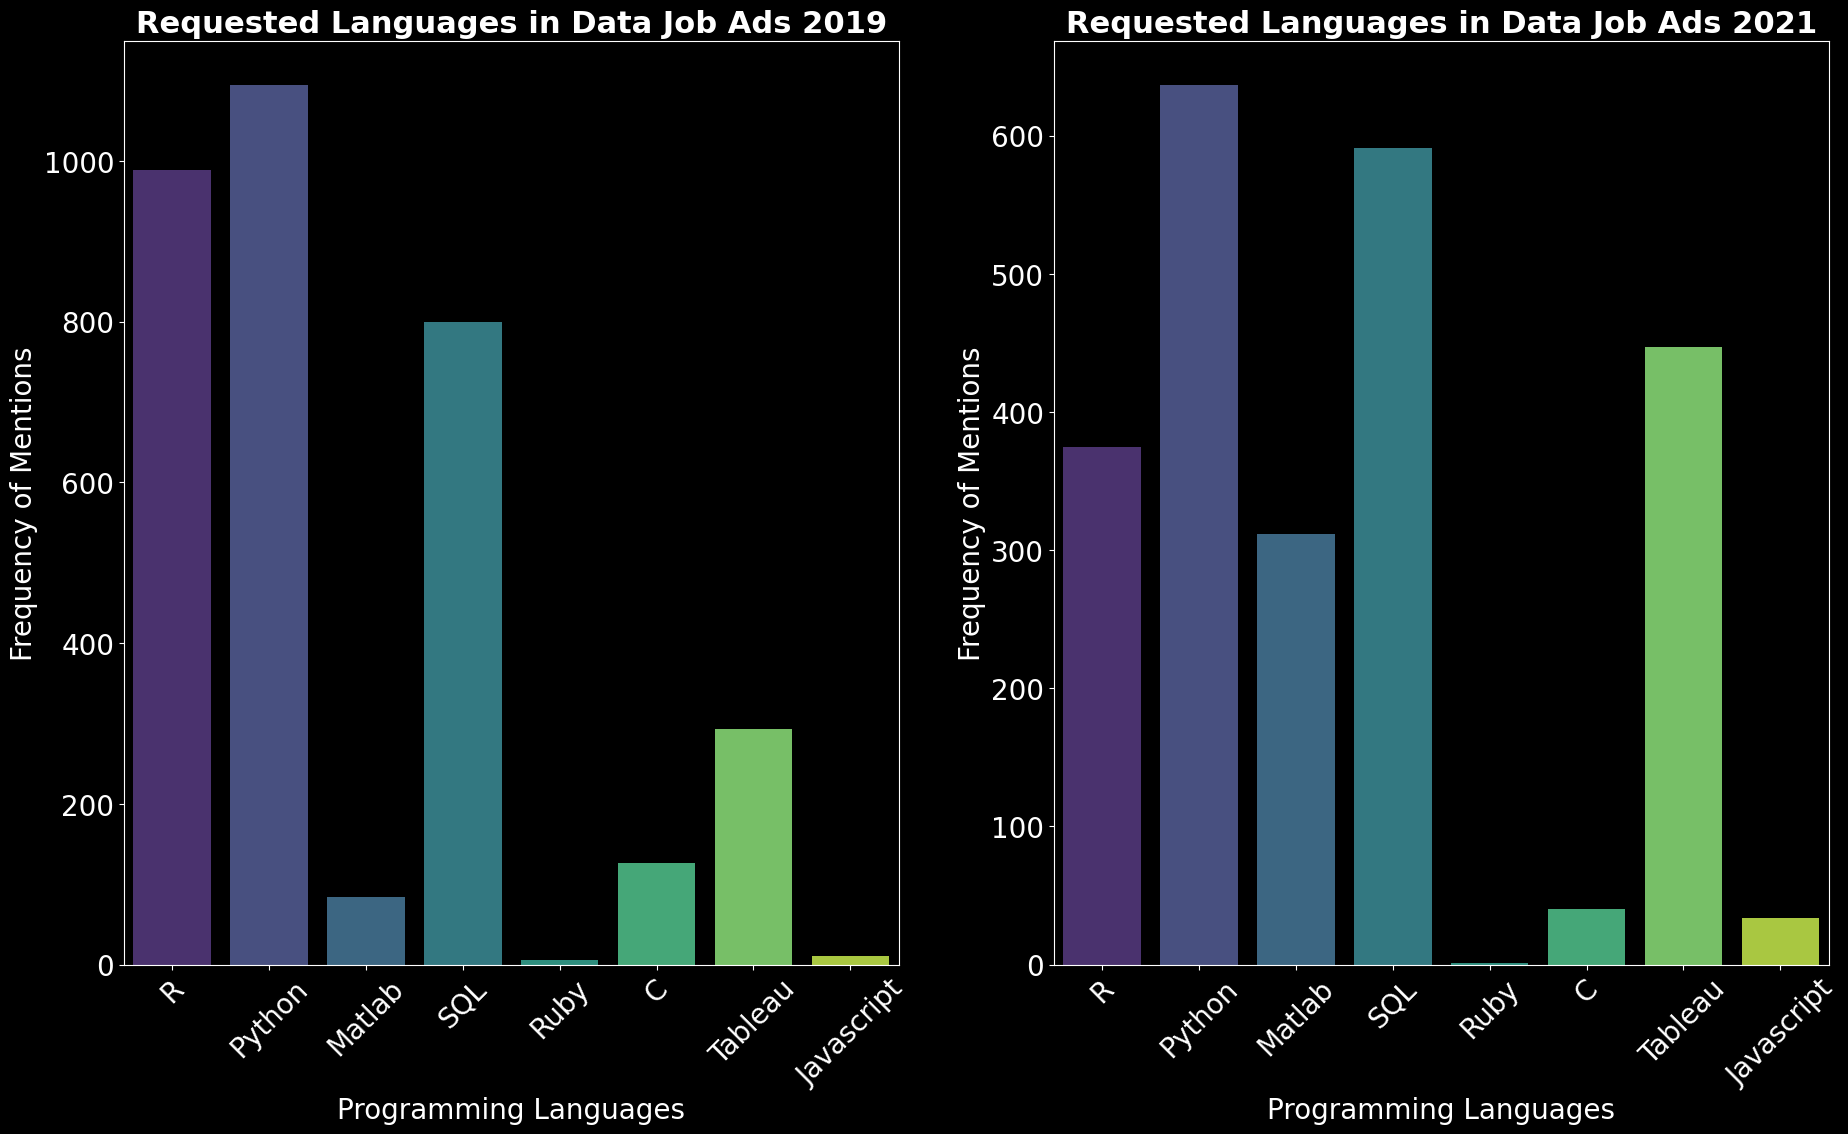

In [99]:
# Create arrray to match
code = ['R', 'Python', 'Matlab', 'SQL', 'Ruby', 'C', 'Tableau', 'Javascript']

# Use pandas sum method to count matches in job_title observation.
code_hits = data_related_jobs[code].sum()

# Create dictionary to receive key:value pairs
code_hits_by_year = {}
# Loop through each year
for year in [2019, 2021]:
    # Filter 'data_related_jobs' to only include rows from the current year. Save to df
    data_for_year = data_related_jobs[data_related_jobs['year'] == year]
    # sum method counts the matches. Saves to dictionary
    code_hits_by_year[year] = data_for_year[code].sum()

# Setup side by side subplots
# change theme using matplotlib style module
with plt.style.context('dark_background'):
    fig, axs = plt.subplots(1, 2, figsize=(22, 12))

# Plot histograms
for i, year in enumerate([2019, 2021]):
    sns.barplot(x=code_hits_by_year[year].index, y=code_hits_by_year[year].values, palette='viridis', ax=axs[i])
    # iterate in year to title
    title = 'Requested Languages in Data Job Ads {}'.format(year)
    axs[i].set_title(title, fontsize=22, fontweight='bold')
    axs[i].set_xlabel('Programming Languages', fontsize=20)
    axs[i].set_ylabel('Frequency of Mentions', fontsize=20)
    axs[i].tick_params(axis='x', rotation=45, labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)
plt.show()

# Horizontal Bar Plot

## Data Scientist Salaries by Job Type

This horizontal bar chart **(Figure 5.3)** presents the average advertised salaries for the most advertused data-related roles in the dataset.

Senior Data Scientists have the highest average salary, closely followed by Data Engineers and Architects. Data Statisticians and Data/Business Analysts have similiar salary ranges. The average Junior Data Scientist has the lowest average salary in this group.

**Analysis:**

- Experience translates to better pay.
- Data Engineers and Architects also earn high salaries, this may suggest a shortage of skills in the job market.
- Salary progression from junior to senior roles offers a good financial incentive to build up skills and advance in the data science field.

Finding the most listed data roles types in the dataset.

In [82]:
# Inspect unique data jobs titles
top_10_job_titles = data_related_jobs['job_title'].value_counts()
top_10_job_titles

job_title
Data Scientist                                      1059
Senior Data Scientist                                293
Data Scientist                                        75
Lead Data Scientist                                   57
Junior Data Scientist                                 35
                                                    ... 
Data Scientist - Automation & AI                       1
Data Scientist | Machine Learning| Deep Learning       1
Data Scientist / Statistical Analyst                   1
Data Scientist -Sydney and Canberra                    1
ORACLE, Master Data Specialist                         1
Name: count, Length: 882, dtype: int64

Next, a **custom function** is needed to group similiar job titles into defined categories

In [83]:
def categorise_job_title(job_title):
    job_title_lower = job_title.lower()
    # Use dictionary again to group together expected keywords to a role
    keywords = {
        'Senior Data Scientist': ['senior', 'lead', 'principal', 'head'],
        'Junior Data Scientist': ['junior', 'graduate', 'intern', 'entry'],
        'Data Engineer / Architect': ['engineer', 'architect', 'engineering', 'architecture'],
        'Data/Business Analyst': ['analyst', 'analytics', 'analysis'],
        'Data Statisticians': ['statistician', 'statistics', 'statistical']
    }

    # Based on the keywords dictionary, count how many keywords are in each instance of 'job_title'
    category_scores = {category: sum(key in job_title_lower for key in keys) for category, keys in keywords.items()}
    # Use the max function to find which category has highest score (based on keyword matches).
    best_match = max(category_scores, key=category_scores.get)
    # If score is greater 0, call best match
    if category_scores[best_match] > 0:
        return best_match
    # Assuming data scientist is the default match
    elif 'data scientist' in job_title_lower:
        return 'Data Scientist'
    # Error handling for instances not covered by 'keywords' or 'Data Scientist'
    else:
        return 'Other Data Related Jobs'

Now pre-processing before any plotting by removing NaNs. Then calling the **custom function** and re-inspecting *'job_title'* 

In [84]:
# Drop null values and filter
data_related_jobs = data_related_jobs['salary_offered'].dropna()
data_related_jobs = seek2018_2019_tamed[seek2018_2019_tamed['job_title'].str.contains('data', case=False, na=False)].copy()

# Call 'categorise_job_titles'
data_related_jobs['job_category'] = data_related_jobs['job_title'].apply(categorise_job_title)
print(data_related_jobs['job_category'].head(100))

1             Data Scientist
4             Data Scientist
5             Data Scientist
6             Data Scientist
7             Data Scientist
               ...          
122           Data Scientist
124           Data Scientist
125    Senior Data Scientist
126    Senior Data Scientist
127    Senior Data Scientist
Name: job_category, Length: 100, dtype: object


After plotting the data is skewed. The box plot investigates outliers in *salary_offered*

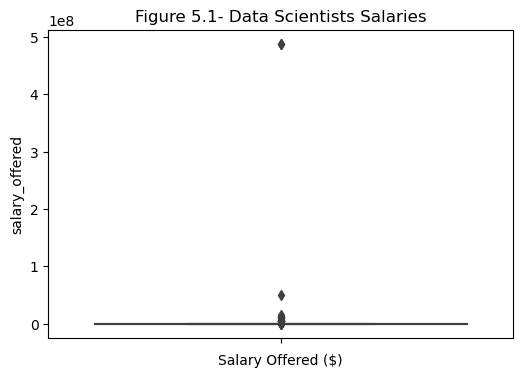

In [110]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_related_jobs['salary_offered'])
plt.title('Figure 5.1- Data Scientists Salaries')
plt.xlabel('Salary Offered ($)')
plt.show()

The outliers are removed by taking the middle of the dataset. Note this boxplot uses the **remove_outliers** function used in earlier boxplots *(Figure 2)*

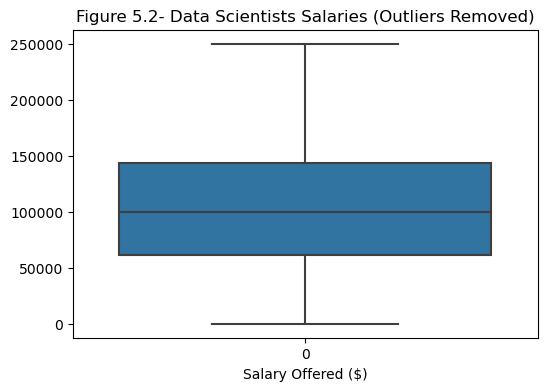

In [111]:
# Use IQR (get the middle 50% of the data).
filtered_data_jobs = filtered_data_jobs.groupby('job_category').apply(remove_outliers, 'salary_offered').reset_index(drop=True)
iqr_salaries = remove_outliers(filtered_data_jobs, 'salary_offered')

plt.figure(figsize=(6, 4))
sns.boxplot(data=iqr_salaries['salary_offered'])
plt.title('Figure 5.2- Data Scientists Salaries (Outliers Removed)')
plt.xlabel('Salary Offered ($)')
plt.show()

Now the distribution looks correct, the custom functions are called
- **categorise_job_title** on *'job_title'* 
- **remove_outliers** on *'salary_offered'*

In [87]:
# Get the dataframe by calling my 'categorise_job_title' function
data_related_jobs['job_category'] = data_related_jobs['job_title'].apply(categorise_job_title)
data_related_jobs['job_category'] = data_related_jobs['job_category'].str.strip().str.lower()

filtered_data_jobs = data_related_jobs[data_related_jobs['job_category'].isin(map(str.lower, job_titles_of_interest))].copy()
filtered_data_jobs = filtered_data_jobs.groupby('job_category').apply(remove_outliers, 'salary_offered').reset_index(drop=True)

The **def_role_salaries** function groups jobs by their custom titles and then sorts by average offered salaries

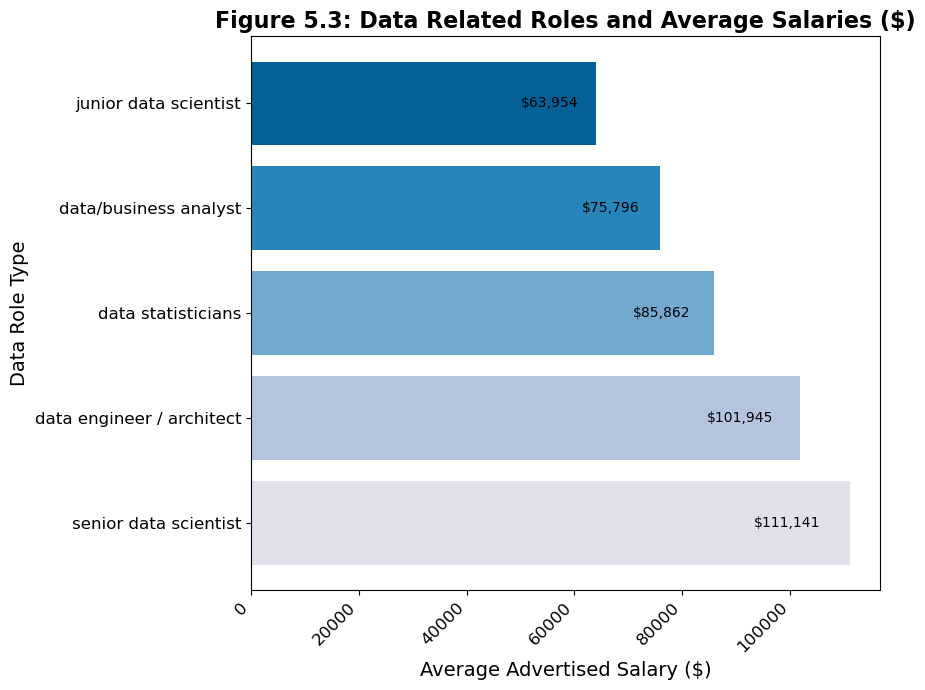

In [112]:
def data_role_salaries(df, job_titles, salary_col='salary_offered', job_title_col='job_category'):
    # Calculate the mean salary using pandas mean method
    mean_salary_by_job_title = filtered_data_jobs.groupby(job_title_col)[salary_col].mean().sort_values(ascending=False)

    # Bar Plot
    plt.figure(figsize=(9, 7))
    colors = sns.color_palette('PuBu', n_colors=len(mean_salary_by_job_title))
    bars = plt.barh(mean_salary_by_job_title.index, mean_salary_by_job_title, color=colors)
    
    # Add value labels to bars
    for bar in bars:
        # use Matplotlibs API methods, get_width to get value of bars. Then place these values center right
        width = bar.get_width()
        label_x_position = width - (0.05 * width)
        plt.text(label_x_position, bar.get_y() + bar.get_height()/2, '${:,.0f}'.format(width), va='center', ha='right')
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Data Role Type', fontsize=14)
    plt.xlabel('Average Advertised Salary ($)', fontsize=14)
    plt.title('Figure 5.3: Data Related Roles and Average Salaries ($)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Sets the array of data jobs types for the function
job_titles_of_interest = [
    'Senior Data Scientist', 'Junior Data Scientist', 'Data Engineer / Architect', 
    'Data/Business Analyst', 'Data Statisticians'
]

data_role_salaries(data_related_jobs, job_titles_of_interest)

# Heatmap

## In demand skills by high salary data roles

This heatmap **(Figure 6)** displays the frequency of programming language mentions in data jobs in the upper 25% of data salaries (high-paying data roles). 

Python has an extremelty high correlation with high paying data roles (a 94% mention rate). High mentions are also evident for both R, SQL and Tableau (71%, 64% and 31% respectively). The combination of visualization and database tools likely indictate the market values mastery of these skills the most. Languages like JavaScript and Ruby are seemingly rarely required for these higher-paying positions.

In [90]:
skills_that_pay = seek2018_2019_clean.copy()
average_log_salaries = {}
language_columns = ['R', 'Python', 'Matlab', 'SQL', 'Ruby', 'C', 'Tableau', 'Javascript']

for language in language_columns:
    # Filter for job listings that mention the language
    language_jobs = skills_that_pay[skills_that_pay[language] == 1]
    # Calculate the average log salary for these listings
    average_log_salaries[language] = np.log1p(language_jobs['salary_offered']).mean()

In [91]:
# Define high salary. Uses Pandas quantile function (taking 75% percentile of 'salary_offered')
upper_quartile_salary = skills_that_pay['salary_offered'].quantile(0.75)

# Filter salary_offered to only include IQ3 high-salary jobs
high_salary_jobs = skills_that_pay[skills_that_pay['salary_offered'] >= upper_quartile_salary]

# Calculate frequency of job listings mentioning each language
# then organise them with sort.values method
language_proportions = high_salary_jobs[language_columns].mean().sort_values(ascending=False)

# Pre-process prior to plotting
language_proportions_df = language_proportions.reset_index()
language_proportions_df.columns = ['Language', 'Proportion']

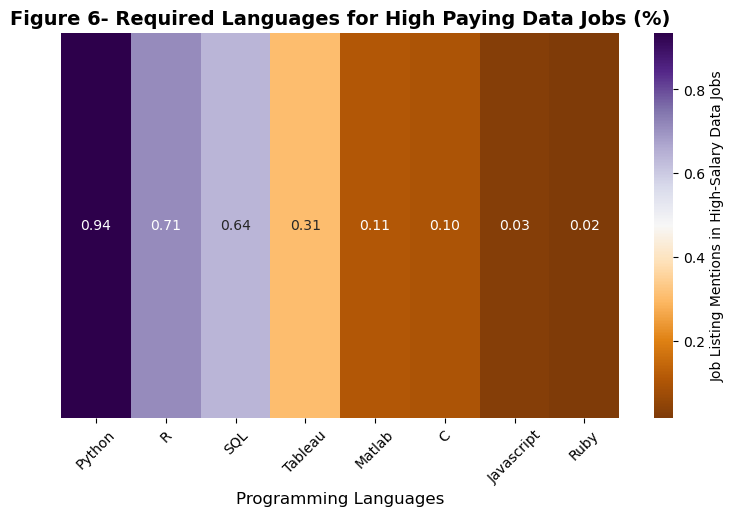

In [92]:
# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(language_proportions_df.set_index('Language').T, annot=True, fmt='.2f', cmap='PuOr', cbar_kws={'label': 'Job Listing Mentions in High-Salary Data Jobs'})
plt.title('Figure 6- Required Languages for High Paying Data Jobs (%)', fontsize=14, fontweight='bold')
plt.xlabel('Programming Languages', fontsize=12)
plt.yticks([])
plt.xticks(rotation=45)
plt.show()